In [ ]:
###### Random Forest - All features
###### Plotting Importance

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import preprocessing
import numpy as np

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data = pd.read_csv(r'application_train.csv')
df = pd.DataFrame(data)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Splitting dependent and independent variables

#ommiting target because it is the Y variable. Omitting ID number because that is unecessary
X = df.drop(['TARGET','SK_ID_CURR'], axis=1) 
Y = df.TARGET


le = preprocessing.LabelEncoder()
le.fit(X['NAME_CONTRACT_TYPE'])
X['NAME_CONTRACT_TYPE'] = le.transform(X['NAME_CONTRACT_TYPE'])

le.fit(X['CODE_GENDER'])
X['CODE_GENDER'] = le.transform(X['CODE_GENDER'])

le.fit(X['FLAG_OWN_CAR'])
X['FLAG_OWN_CAR'] = le.transform(X['FLAG_OWN_CAR'])

le.fit(X['FLAG_OWN_REALTY'])
X['FLAG_OWN_REALTY'] = le.transform(X['FLAG_OWN_REALTY'])

le.fit(X['NAME_TYPE_SUITE'].astype(str))
X['NAME_TYPE_SUITE'] = le.transform(X['NAME_TYPE_SUITE'].astype(str))

le.fit(X['NAME_INCOME_TYPE'])
X['NAME_INCOME_TYPE'] = le.transform(X['NAME_INCOME_TYPE'])

le.fit(X['NAME_EDUCATION_TYPE'])
X['NAME_EDUCATION_TYPE'] = le.transform(X['NAME_EDUCATION_TYPE'])

le.fit(X['NAME_FAMILY_STATUS'])
X['NAME_FAMILY_STATUS'] = le.transform(X['NAME_FAMILY_STATUS'])

le.fit(X['NAME_HOUSING_TYPE'].astype(str))
X['NAME_HOUSING_TYPE'] = le.transform(X['NAME_HOUSING_TYPE'].astype(str))

le.fit(X['OCCUPATION_TYPE'].astype(str))
X['OCCUPATION_TYPE'] = le.transform(X['OCCUPATION_TYPE'].astype(str))
                                      
le.fit(X['WEEKDAY_APPR_PROCESS_START'])
X['WEEKDAY_APPR_PROCESS_START'] = le.transform(X['WEEKDAY_APPR_PROCESS_START'])
                                      
                                     
le.fit(X['ORGANIZATION_TYPE'])
X['ORGANIZATION_TYPE'] = le.transform(X['ORGANIZATION_TYPE'])


le.fit(X['FONDKAPREMONT_MODE'].astype(str))
X['FONDKAPREMONT_MODE'] = le.transform(X['FONDKAPREMONT_MODE'].astype(str))

le.fit(X['HOUSETYPE_MODE'].astype(str))
X['HOUSETYPE_MODE'] = le.transform(X['HOUSETYPE_MODE'].astype(str))

le.fit(X['WALLSMATERIAL_MODE'].astype(str))
X['WALLSMATERIAL_MODE'] = le.transform(X['WALLSMATERIAL_MODE'].astype(str))

le.fit(X['EMERGENCYSTATE_MODE'].astype(str))
X['EMERGENCYSTATE_MODE'] = le.transform(X['EMERGENCYSTATE_MODE'].astype(str))



print(X['CODE_GENDER'])

0         1
1         0
2         1
3         0
4         1
         ..
307506    1
307507    0
307508    0
307509    0
307510    0
Name: CODE_GENDER, Length: 307511, dtype: int32


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
X_test.fillna(X_train.mean(), inplace=True)
X_test = X_test.fillna(X_train.mean())

X_train.fillna(X_train.mean(), inplace=True)
X_train = X_train.fillna(X_train.mean())



#Create model

clf = RandomForestClassifier()
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Accuracy: 0.9191362976131117


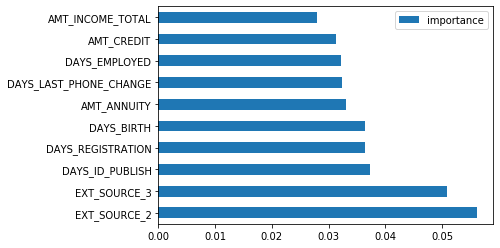

In [5]:
clf.feature_importances_
feature_importances = pd.DataFrame(clf.feature_importances_, index =X.columns,  
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.nlargest(10,'importance').plot(kind='barh')